   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


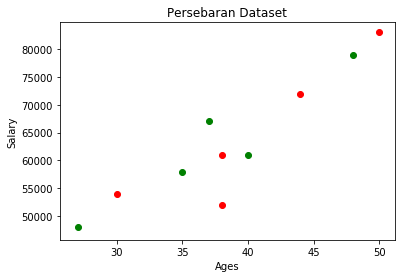

In [4]:
# === Require Scipy ===
# from datacleaner import autoclean
from sklearn.preprocessing import Imputer
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# === Import data csv dengan pandas ===
df = pd.read_csv('Data.csv')
print (df)

# === Cara cek cell yang kosong True = Kosong ===
# df.isnull()


# === Cara replace nilai kosong dengan kata 'NONE' ===
# df = df.astype(object).where(pd.notnull(df),None)
# df

# === Ini cara mudah clening data :v ===
# p = autoclean(df)
# print (p)

# separate array into input and output components
array = df.values
# print(array)
inputan = df.iloc[:,:-1].values

# === Ganti dengan mean ===
imputer=Imputer(missing_values='NaN',strategy='median',axis=0)
imputer=imputer.fit(inputan[:, 1:3])
inputan[:, 1:3]=imputer.transform(inputan[:, 1:3])
# print(inputan)

# === pindahin data ke array ===
for j in range(len(array)):
    array[j,1] = inputan[j,1]
    array[j,2] = inputan[j,2]

# === gabungin semuanya ke 1 array ===
join = array[:,:]
# print(join)

Y = join[:,1]
Z = join[:,2]

x1k0=[]
x2k0=[]
x1k1=[]
x2k1=[]

for i in range(len(join)):
    if join[i,-1] == 'No':
        x1k0.append(join[i,1])
        x2k0.append(join[i,2])
    elif join[i,-1] == 'Yes':
        x1k1.append(join[i,1])
        x2k1.append(join[i,2])

plt.scatter(x1k0,x2k0, label='No', c='r')
plt.scatter(x1k1,x2k1, label='Yes', c='g')


plt.xlabel('Ages')
plt.ylabel('Salary')
plt.title('Persebaran Dataset')
# plt.axis([0, 50, 0, 10000])
plt.show()